# k-means 알고리즘으로 붓꽃 품종 구분하기

In [555]:
import pandas as pd
from sklearn.datasets import load_iris

import warnings
warnings.filterwarnings(action='ignore')

In [556]:
iris = load_iris()

In [557]:
from sklearn.cluster import KMeans
iris_df = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [558]:
km = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=42)
km.fit(iris_df)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [559]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [560]:
iris_df['target'] = iris.target
iris_df['cluster'] = km.labels_
iris_df.groupby(['target', 'cluster']).count()

sepal_length  sepal_width  petal_length  petal_width
target cluster                                                      
0      1                  50           50            50           50
1      0                   3            3             3            3
       2                  47           47            47           47
2      0                  36           36            36           36
       2                  14           14            14           14

# silhouette 계수 측정

In [561]:
from sklearn.metrics import silhouette_score, silhouette_samples

score_samples = silhouette_samples(iris.data, iris_df['cluster'])
iris_df['silhouette_coeff'] = score_samples
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,1,0.852582
1,4.9,3.0,1.4,0.2,0,1,0.814916
2,4.7,3.2,1.3,0.2,0,1,0.828797
3,4.6,3.1,1.5,0.2,0,1,0.804352
4,5.0,3.6,1.4,0.2,0,1,0.848918
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,0.424561
146,6.3,2.5,5.0,1.9,2,2,0.103125
147,6.5,3.0,5.2,2.0,2,0,0.316810
148,6.2,3.4,5.4,2.3,2,0,0.347855


In [562]:
silhouette_score(iris.data, iris_df['cluster'])

0.5511916046195919

# 실루엣 차트

In [563]:
import matplotlib.pyplot as plt

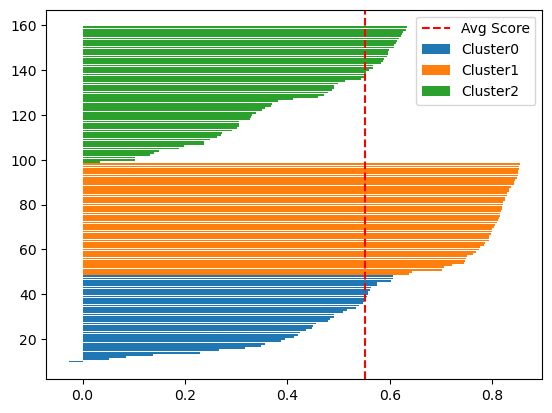

In [564]:
y_lower = 10

for i in range(3):
    cluster_i = score_samples[iris_df['cluster'] == i]
    cluster_i.sort()
    y_upper = y_lower + len(cluster_i)
    plt.barh(range(y_lower, y_upper), cluster_i, label = f'Cluster{i}')
    y_lower = y_upper
    
avg_score = silhouette_score(iris.data, iris_df['cluster'])
plt.axvline(avg_score, color='red', linestyle='--', label = 'Avg Score')
plt.legend()
plt.show()

# scree plot

In [565]:
# SSE 값
km.inertia_

78.85566582597728

In [566]:
scree_df = iris_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

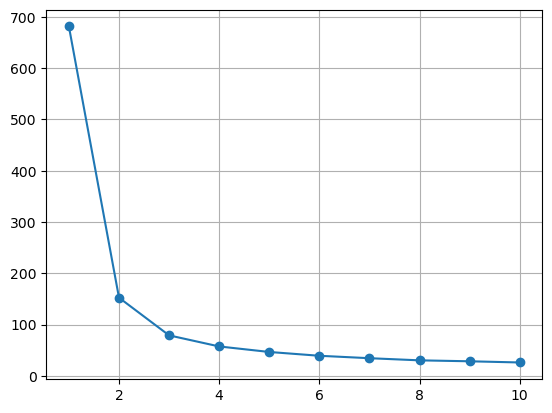

In [567]:
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(scree_df)
    inertia.append(kmeans.inertia_)
    
plt.plot(k_values, inertia, marker='o')
plt.grid()
plt.show()

# PCA 주성분 분석

In [568]:
# 2개의 주성분으로 축소
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)
pca_transformed.shape

(150, 2)

In [569]:
iris_df['pca_x'] = pca_transformed[:, 0]
iris_df['pca_y'] = pca_transformed[:, 1]
iris_df

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_coeff,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,0.852582,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,0.814916,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,0.828797,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,0.804352,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,0.848918,-2.728717,0.326755
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,0.424561,1.944110,0.187532
146,6.3,2.5,5.0,1.9,2,2,0.103125,1.527167,-0.375317
147,6.5,3.0,5.2,2.0,2,0,0.316810,1.764346,0.078859
148,6.2,3.4,5.4,2.3,2,0,0.347855,1.900942,0.116628


# PCA 결과 시각화

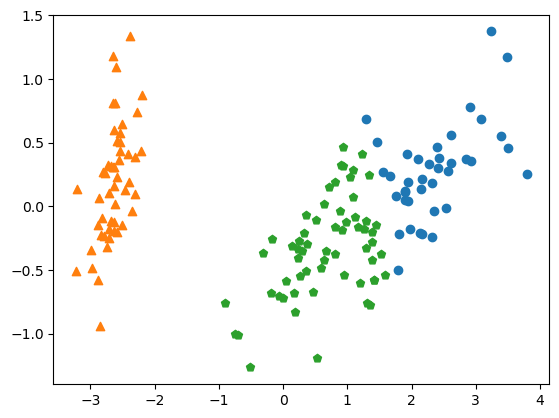

In [570]:
plt.scatter(x=iris_df.loc[iris_df['cluster'] == 0, 'pca_x']
            , y=iris_df.loc[iris_df['cluster'] == 0, 'pca_y']
            , marker='o')

plt.scatter(x=iris_df.loc[iris_df['cluster'] == 1, 'pca_x']
            , y=iris_df.loc[iris_df['cluster'] == 1, 'pca_y']
            , marker='^')

plt.scatter(x=iris_df.loc[iris_df['cluster'] == 2, 'pca_x']
            , y=iris_df.loc[iris_df['cluster'] == 2, 'pca_y']
            , marker='p')
plt.show()

# StandardScaler로 스케일링
- PCA 2개로 축소
- 시각화

In [571]:
from sklearn.preprocessing import StandardScaler

# 1. 복사본 생성
scaled_df = iris_df.copy()

# 2. 스케일링 대상 선택
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = scaled_df[features]

# 3. StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. PCA
from sklearn.decomposition import PCA
s_pca = PCA(n_components=2)
X_pca = s_pca.fit_transform(X_scaled)

# 5. 추가
scaled_df['pca_x'] = X_pca[:, 0]
scaled_df['pca_y'] = X_pca[:, 1]

In [572]:
scaled_df

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,silhouette_coeff,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,0.852582,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,1,0.814916,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,1,0.828797,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,1,0.804352,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,1,0.848918,-2.389842,0.646835
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0,0.424561,1.870503,0.386966
146,6.3,2.5,5.0,1.9,2,2,0.103125,1.564580,-0.896687
147,6.5,3.0,5.2,2.0,2,0,0.316810,1.521170,0.269069
148,6.2,3.4,5.4,2.3,2,0,0.347855,1.372788,1.011254


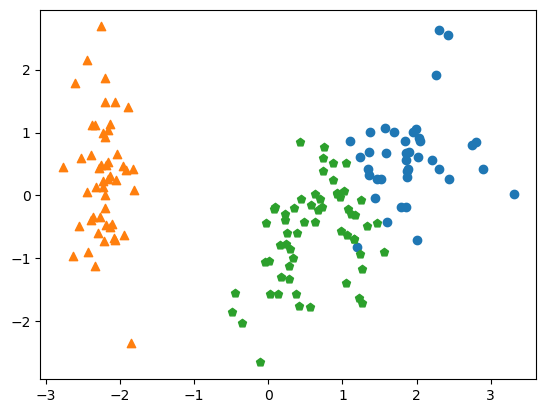

In [573]:
plt.scatter(x=scaled_df.loc[scaled_df['cluster'] == 0, 'pca_x']
            , y=scaled_df.loc[scaled_df['cluster'] == 0, 'pca_y']
            , marker='o')

plt.scatter(x=scaled_df.loc[scaled_df['cluster'] == 1, 'pca_x']
            , y=scaled_df.loc[scaled_df['cluster'] == 1, 'pca_y']
            , marker='^')

plt.scatter(x=scaled_df.loc[scaled_df['cluster'] == 2, 'pca_x']
            , y=scaled_df.loc[scaled_df['cluster'] == 2, 'pca_y']
            , marker='p')
plt.show()

In [574]:
print(pca.explained_variance_ratio_)
print(s_pca.explained_variance_ratio_)

[0.92461872 0.05306648]
[0.72962445 0.22850762]


# 클러스터링 실습

In [575]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [576]:
cancer.data.shape

(569, 30)

In [577]:
pca_raw = PCA(n_components=2)
X_pca_raw = pca_raw.fit_transform(cancer.data)

kmeans_raw = KMeans(n_clusters=2, random_state=42)
clusters_raw = kmeans_raw.fit_predict(X_pca_raw)

df_raw_pca = pd.DataFrame(X_pca_raw, columns=['pca_x', 'pca_y'])
df_raw_pca['cluster'] = clusters_raw
df_raw_pca['target'] = cancer.target


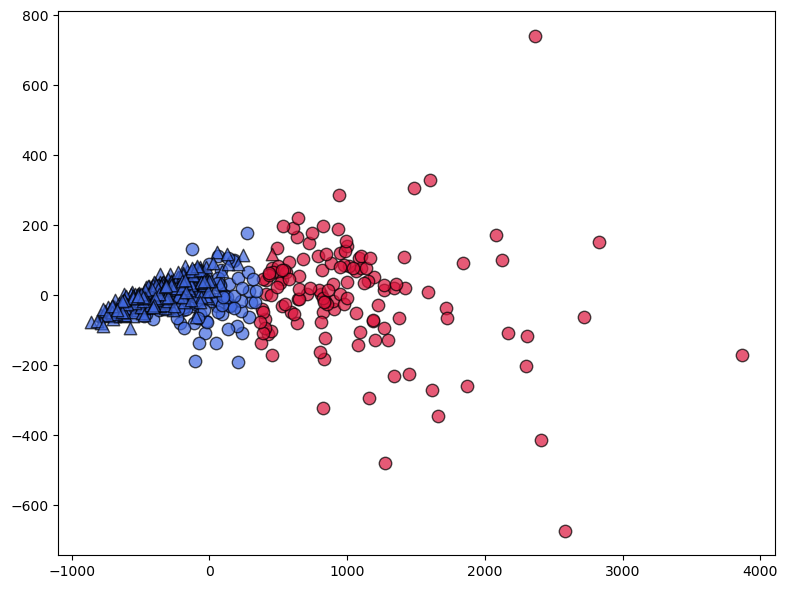

In [578]:
cluster_colors = {0: 'crimson', 1: 'royalblue'}
target_markers = {0: 'o', 1: '^'}

plt.figure(figsize=(8, 6))
for cluster_id in [0, 1]:
    for target_id in [0, 1]:
        subset = df_raw_pca[(df_raw_pca['cluster'] == cluster_id) & (df_raw_pca['target'] == target_id)]
        plt.scatter(subset['pca_x'], subset['pca_y'],
                    c=cluster_colors[cluster_id],
                    marker=target_markers[target_id],
                    label=f'Cluster {cluster_id} / Target {target_id}',
                    edgecolor='black',
                    s=80,
                    alpha=0.7)

plt.tight_layout()
plt.show()

In [579]:
print(pca_raw.explained_variance_ratio_)

[0.98204467 0.01617649]


In [580]:
X = cancer.data
y = cancer.target
features = cancer.feature_names

# 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA (2차원으로 축소)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# 결과 데이터프레임
df = pd.DataFrame(X_pca, columns=['pca_x', 'pca_y'])
df['cluster'] = clusters
df['target'] = y

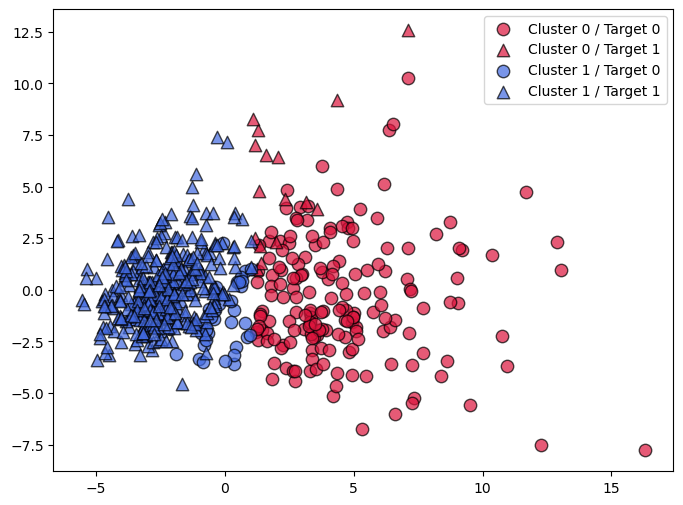

In [581]:
cluster_colors = {0: 'crimson', 1: 'royalblue'}

target_markers = {0: 'o', 1: '^'}

plt.figure(figsize=(8, 6))

for cluster_id in [0, 1]:
    for target_id in [0, 1]:
        subset = df[(df['cluster'] == cluster_id) & (df['target'] == target_id)]
        plt.scatter(subset['pca_x'], subset['pca_y'],
                    c=cluster_colors[cluster_id],
                    marker=target_markers[target_id],
                    label=f'Cluster {cluster_id} / Target {target_id}',
                    edgecolor='black',
                    s=80,
                    alpha=0.7)
plt.legend()
plt.show()

In [582]:
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182]


In [583]:
explained_var_ratios = []
silhouette_scores = []
components_range = range(2, 16)

for n in components_range:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    explained_var_ratios.append(pca.explained_variance_ratio_.sum())

    kmeans = KMeans(n_clusters=2, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, cluster_labels)
    silhouette_scores.append(score)

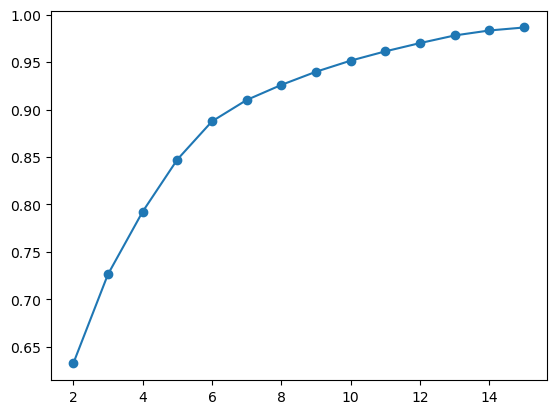

In [584]:
plt.plot(components_range, explained_var_ratios, marker='o')

plt.show()

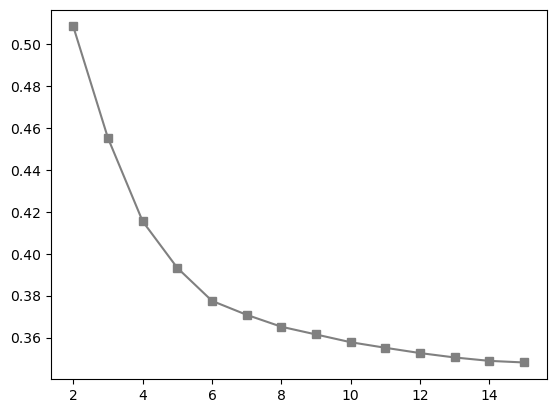

In [585]:
plt.plot(components_range, silhouette_scores, marker='s', color='gray')
plt.show()

In [597]:
def run_pca_kmeans(n_components, X_scaled, y):
    # 1. PCA
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X_scaled)

    # 2. KMeans
    kmeans = KMeans(n_clusters=2, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)

    # 3. 평가 지표
    explained = pca.explained_variance_ratio_.sum()
    sil_score = silhouette_score(X_pca, cluster_labels)


    return {
        'n_components': n_components,
        'explained_var': explained,
        'silhouette': sil_score,
    }


In [598]:
results = []

for n in range(2, 11):
    res = run_pca_kmeans(n_components=n, X_scaled=X_scaled, y=y)
    results.append(res)

# 결과
df_results = pd.DataFrame(results)
print(df_results)

   n_components  explained_var  silhouette
0             2       0.632432    0.508469
1             3       0.726364    0.455227
2             4       0.792385    0.415474
3             5       0.847343    0.393223
4             6       0.887588    0.377484
5             7       0.910095    0.370822
6             8       0.925983    0.365136
7             9       0.939879    0.361443
8            10       0.951569    0.357745


pca 5개

In [588]:
pca5 = PCA(n_components=5)
X_pca5 = pca5.fit_transform(X_scaled)
print(pca5.explained_variance_ratio_)

kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca5)

pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_pca5)

df_pca = pd.DataFrame(X_pca2, columns=['pca1', 'pca2'])
df_pca['cluster'] = cluster_labels
df_pca['target'] = y

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]


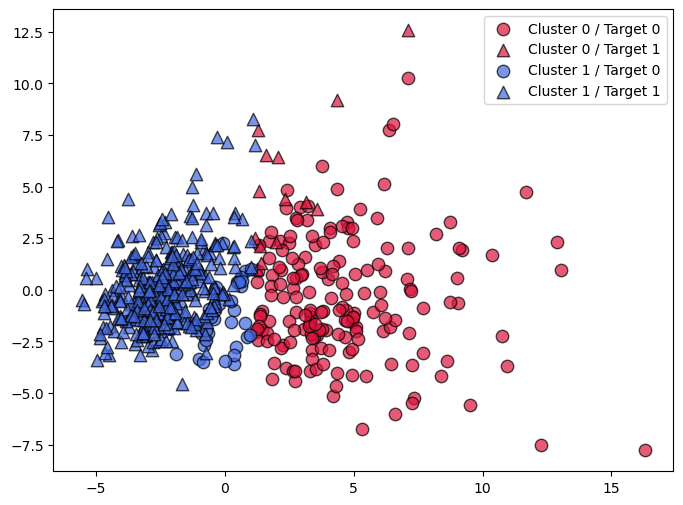

In [589]:
cluster_colors = {0: 'crimson', 1: 'royalblue'}

target_markers = {0: 'o', 1: '^'}

plt.figure(figsize=(8, 6))

for cluster_id in [0, 1]:
    for target_id in [0, 1]:
        subset = df_pca[(df_pca['cluster'] == cluster_id) & (df_pca['target'] == target_id)]
        plt.scatter(subset['pca1'], subset['pca2'],
                    c=cluster_colors[cluster_id],
                    marker=target_markers[target_id],
                    label=f'Cluster {cluster_id} / Target {target_id}',
                    edgecolor='black',
                    s=80,
                    alpha=0.7)
plt.legend()
plt.show()

pca 6개

In [590]:
pca6 = PCA(n_components=6)
X_pca6 = pca6.fit_transform(X_scaled)
print(pca6.explained_variance_ratio_)

kmeans6 = KMeans(n_clusters=2, random_state=42)
cluster_labels6 = kmeans6.fit_predict(X_pca6)

pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_pca6)

df_pca6 = pd.DataFrame(X_pca2, columns=['pca1', 'pca2'])
df_pca6['cluster'] = cluster_labels6
df_pca6['target'] = y

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522]


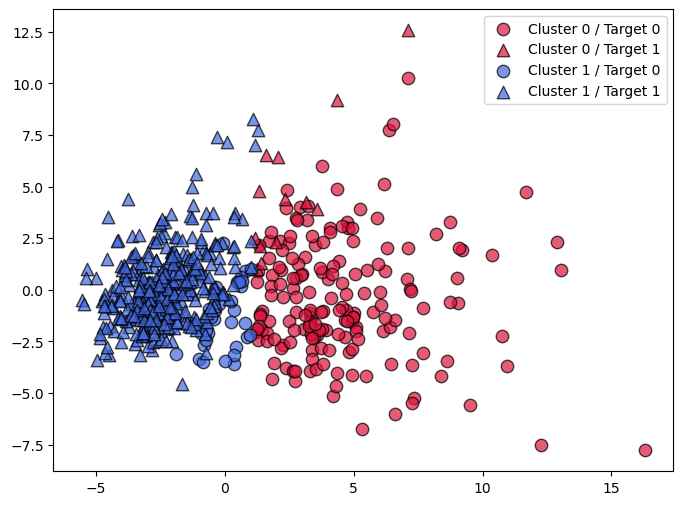

In [591]:
cluster_colors = {0: 'crimson', 1: 'royalblue'}

target_markers = {0: 'o', 1: '^'}

plt.figure(figsize=(8, 6))

for cluster_id in [0, 1]:
    for target_id in [0, 1]:
        subset = df_pca6[(df_pca6['cluster'] == cluster_id) & (df_pca6['target'] == target_id)]
        plt.scatter(subset['pca1'], subset['pca2'],
                    c=cluster_colors[cluster_id],
                    marker=target_markers[target_id],
                    label=f'Cluster {cluster_id} / Target {target_id}',
                    edgecolor='black',
                    s=80,
                    alpha=0.7)
plt.legend()
plt.show()

pca 4개

In [592]:
pca4 = PCA(n_components=4)
X_pca4 = pca4.fit_transform(X_scaled)
print(pca4.explained_variance_ratio_)

kmeans4 = KMeans(n_clusters=2, random_state=42)
cluster_labels4 = kmeans4.fit_predict(X_pca4)

pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_pca4)

df_pca4 = pd.DataFrame(X_pca2, columns=['pca1', 'pca2'])
df_pca4['cluster'] = cluster_labels4
df_pca4['target'] = y

[0.44272026 0.18971182 0.09393163 0.06602135]


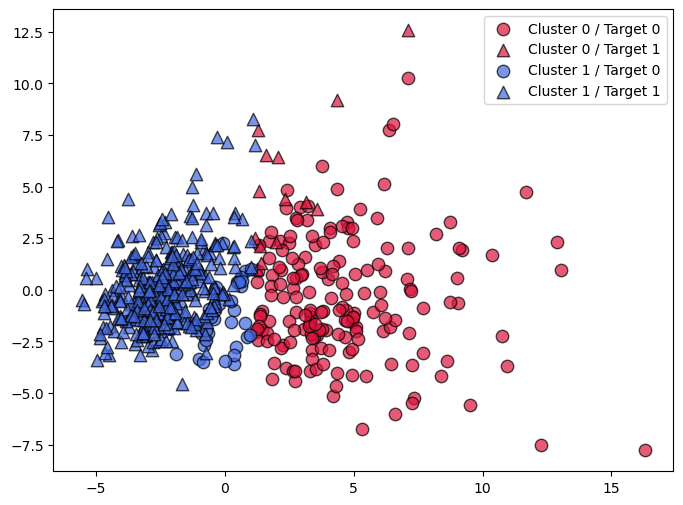

In [593]:
cluster_colors = {0: 'crimson', 1: 'royalblue'}

target_markers = {0: 'o', 1: '^'}

plt.figure(figsize=(8, 6))

for cluster_id in [0, 1]:
    for target_id in [0, 1]:
        subset = df_pca4[(df_pca4['cluster'] == cluster_id) & (df_pca4['target'] == target_id)]
        plt.scatter(subset['pca1'], subset['pca2'],
                    c=cluster_colors[cluster_id],
                    marker=target_markers[target_id],
                    label=f'Cluster {cluster_id} / Target {target_id}',
                    edgecolor='black',
                    s=80,
                    alpha=0.7)
plt.legend()
plt.show()